In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

# Course reminder

### The motivation:

Many machine learning problems write as follows:

\begin{equation*}
\min_{f\in \mathcal{F}} \frac{1}{n}\sum_{i=1}^n \ell(f(x_i),y_i) + \lambda \Omega(f)
\end{equation*}

for some hypothesis space $\mathcal{F}$ and some regularization $\Omega$.

Kernel methods allow to manipulate very large hypothesis spaces $\mathcal{F}$.

### Kernels and RKHS:

As seen in the course, each kernel $k : \mathbb{R}^d \times \mathbb{R}^d \mapsto \mathbb{R}$ is associated with a feature map $\phi : \mathbb{R}^d \mapsto \mathcal{H}$ where $\mathcal{H}$ is an Hilbert space of infinite dimension called the RKHS whose scalar product satisfies


\begin{equation*}
\langle \phi(x), \phi(y) \rangle_\mathcal{H} = k(x,y)
\end{equation*}

$\mathcal{H}$ is actually a functionnal space and, in particular, $\phi(x)$ is the function $f_x: y \mapsto k(x,y)$.

\begin{equation*}
\phi(x) = f_x
\end{equation*}

Note that $\mathcal{H}$ contains the $f_x$ but also other functions. Actually we have that:

$$\mathcal{H} = \overline{\text{Span}\{ \phi(x) \mid x \in \mathbb{R}^d \}}$$

$\mathcal{H}$ is typically very large which makes it an ideal hypothesis space.

All functions in $f \in \mathcal{H}$ satisfy the reproducing property:

\begin{equation*}
f(x) = \langle f, \phi(x) \rangle_\mathcal{H}
\end{equation*}



### Back to regression:

The hypothesis space $\mathcal{H}$ defined through the kernel is very large, fortunately the representer theorem garantees that the solution of any problem of the form

\begin{equation*}
\min_{f\in \mathcal{F}} \frac{1}{n}\sum_{i=1}^n \ell(f(x_i),y_i) + \lambda ||f||_\mathcal{H}^2
\end{equation*}

Can be written as

\begin{equation*}
f^* = \sum_{i=1}^n \alpha_i \phi(x_i)
\end{equation*}

i.e.

\begin{equation*}
f^*(x) = \sum_{i=1}^n \alpha_i k(x,x_i)
\end{equation*}

Meaning that finding the best function in $\mathcal{F}$ (which is infinite) is equivalent to find the right $\alpha \in \mathbb{R}^n$ !


# I. Basic kernel manipulations

Notations:

- $x_1,\ldots,x_n$ are the training point in $\mathbb{R}^d$.
- The matrix $X$ is defined as $X = [x_1^T,...,x_n^T]$
- Similarly $z_1,...,z_m$ are the test points and $Z = [z_1^T,...,z_m^T]$
- We denote $K^{xx}$ the gram matrix of the train set that is $K^{xx}_{i,j} = k(x_i,x_j)$. When there is no ambiguity we simply denote it $K$.
- We denote $K^{xz}$ the train/test product matrix that is $K^{xz}_{i,j} = k(x_i,z_j)$

The most popular/common kernel is the gaussian kernel

$$k(x,y) = \exp\left(-\frac{||x-y||_2^2}{\sigma^2}\right)$$

Q1) Prove that this is actually a kernel (check the definition in your course!). Tip: start with the proof in dimension 1 and for $\sigma = 1$.

To prove the Gaussian kernel $k(x, y) = \exp\left(-\frac{\|x - y\|_2^2}{\sigma^2}\right)$ is a valid kernel, we need to show that it is symmetric and positive semi-definite.

- Symmetry

  For $\sigma = 1$ and $x, y \in \mathbb{R}$, the kernel is:
  $$
  k(x, y) = \exp\left(-(x - y)^2\right).
  $$
  Since $(x - y)^2 = (y - x)^2$, which extends to the L2 norm for higher dimensions $\|x - y\|_2^2 = \|y - x\|_2^2$, we have $k(x, y) = k(y, x)$, so the kernel is symmetric.

- Positive Semi-Definiteness:

  For $\sigma = 1$ and a set of points $x_1, \ldots, x_n \in \mathbb{R}$, the Gram matrix $K$ with entries $K_{ij} = k(x_i, x_j)$ is:

  $$
  K_{ij} = \exp\left(-(x_i - x_j)^2\right).
  $$

  We need to show $\alpha^T K \alpha \geq 0$ for any $\alpha \in \mathbb{R}^n$. This quadratic form represents a sum of Gaussian functions, which is non-negative. Even for $\sigma \neq 1$, we have $\sigma^2 > 0$ so the functions are still always non-negative. By the Bochner theorem, Gaussian kernels are positive semi-definite, as they are the Fourier transform of a non-negative function.

- Generalization

  In $\mathbb{R}^d$, the Gaussian kernel is:
  $$
  k(x, y) = \exp\left(-\frac{\|x - y\|_2^2}{\sigma^2}\right).
  $$
  This is symmetric and a product of 1-dimensional positive semi-definite kernels, preserving positive semi-definiteness.

The Gaussian kernel is, thus, both symmetric and positive semi-definite, making it a valid kernel.

Q2) Same question for the linear kernel

$$k(x,y) = \langle x, y \rangle$$

To prove the linear kernel $k(x,y) = \langle x, y \rangle$ is a valid kernel, we need to show that it is symmetric and positive semi-definite.

- Symmetry:

  The linear kernel is defined as the dot product:

  $$
  k(x, y) = \langle x, y \rangle = \sum_{i=1}^d x_i y_i.
  $$

  Since $\langle x, y \rangle = \langle y, x \rangle$, the kernel is symmetric.

- Positive Semi-Definiteness:

  For any set of points $x_1, \ldots, x_n \in \mathbb{R}^d$, the Gram matrix $K$ has entries $K_{ij} = \langle x_i, x_j \rangle$. To show that the kernel is positive semi-definite, we need to verify that for any vector $\alpha \in \mathbb{R}^n$, the following holds:

  $$
  \alpha^T K \alpha = \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j \langle x_i, x_j \rangle = \left\langle \sum_{i=1}^n \alpha_i x_i, \sum_{j=1}^n \alpha_j x_j \right\rangle \geq 0.
  $$

  This expression is the dot product of the vector $\sum_{i=1}^n \alpha_i x_i$ with itself, which is always non-negative because the dot product of any vector with itself is non-negative.

The linear kernel $k(x, y) = \langle x, y \rangle$ is symmetric and positive semi-definite, making it a valid kernel.

Q3) For any $f \in \mathcal{H}$ of the form  $f = \sum_{i=1}^n \alpha_i \phi(x_i)$,  compute $||f||_\mathcal{H}^2$. Compute the expressions of:

- The norm: $||f||_\mathcal{H}^2$. It should depend only on $K$ and $\alpha$.
- The train prediction vector: $[f(x_1),...,f(x_n)]$. Idem.
- The test prediction vector: $[f(z_1),...,f(z_m)]$. It should depend only on $K^{x,z}$ and $\alpha$.

Given $f \in \mathcal{H}$ in the form $f = \sum_{i=1}^n \alpha_i \phi(x_i)$, we compute the following:

- 1. Norm $||f||_\mathcal{H}^2$

  The norm is given by:

  $$
  ||f||_\mathcal{H}^2 = \left\langle f, f \right\rangle_\mathcal{H} = \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j \langle \phi(x_i), \phi(x_j) \rangle.
  $$

  Since $\langle \phi(x_i), \phi(x_j) \rangle = k(x_i, x_j) = K_{ij}$, we have:

  $$
  ||f||_\mathcal{H}^2 = \alpha^T K^{x,x} \alpha.
  $$

- 2. Train Prediction Vector $[f(x_1), \ldots, f(x_n)]$

  The prediction for each $x_i$ is:
  $$
  f(x_i) = \sum_{j=1}^n \alpha_j k(x_j, x_i).
  $$
  Thus, the train prediction vector is:
  $$
  [f(x_1), \ldots, f(x_n)] = K^{x,x} \alpha.
  $$

- 3. Test Prediction Vector $[f(z_1), \ldots, f(z_m)]$

  For test points $z_1, \ldots, z_m$, the prediction for each $z_j$ is:
  $$
  f(z_j) = \sum_{i=1}^n \alpha_i k(x_i, z_j).
  $$
  Thus, the test prediction vector is:
  $$
  [f(z_1), \ldots, f(z_m)] = K^{x,z} \alpha.
  $$

Q4) Complete the following code (application of the previous questions)

In [2]:
class Kernel:
    def compute_norm_f(self, Kxx, alpha):
        """
        Input:
            Kxx: numpy array of shape (n, n)
            alpha: numpy array of shape (n)
        Output:
            norm_f: float
        """

        norm_f = alpha.T @ Kxx @ alpha

        return norm_f

    def compute_prediction_train(self, Kxx, alpha):
        """
        Input:
            Kxx: numpy array of shape (n, n)
            alpha: numpy array of shape (n)
        Output:
            y: numpy array of shape (n)
        """

        y = Kxx @ alpha

        return y

    def compute_prediction_test(self, Kxz, alpha):
        """
        Input:
            Kxz: numpy array of shape (n, m)
            alpha: numpy array of shape (n)
        Output:
            y: numpy array of shape (m)
        """

        y = Kxz.T @ alpha

        return y


class GaussianKernel(Kernel):

    def __init__(self, sigma=1):
        self.sigma = sigma

    def get_Kxx(self, X):
        """
        Input:
            X: numpy array of shape (n, d)
        Output:
            Kxx: gnumpy array of shape (n, n)
        """

        n = X.shape[0]
        Kxx = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                Kxx[i, j] = np.exp(
                    -np.linalg.norm(X[i] - X[j]) ** 2 / (2 * self.sigma**2)
                )

        return Kxx

    def get_Kxz(self, X, Z):
        """
        Input:
            X: numpy array of shape (n, d)
            Z: numpy array of shape (m, d)
        Output:
            Kxz: gnumpy array of shape (n, m)
        """
        n = X.shape[0]
        m = Z.shape[0]
        Kxz = np.zeros((n, m))
        for i in range(n):
            for j in range(m):
                Kxz[i, j] = np.exp(
                    -np.linalg.norm(X[i] - Z[j]) ** 2 / (2 * self.sigma**2)
                )

        return Kxz


class LinearKernel(Kernel):

    def __init__(self):
        pass

    def get_Kxx(self, X):
        """
        Input:
            X: numpy array of shape (n, d)
        Output:
            Kxx: gnumpy array of shape (n, n)
        """

        Kxx = X @ X.T

        return Kxx

    def get_Kxz(self, X, Z):
        """
        Input:
            X: numpy array of shape (n, d)
            Z: numpy array of shape (m, d)
        Output:
            Kxz: gnumpy array of shape (n, m)
        """

        Kxz = X @ Z.T

        return Kxz

# II. Centering the data in a RKHS

Many ML algorithm expect the data to be centered i.e. $\overline{x} = \frac{1}{n} \sum_{i=1}^n x_i = 0$. When it is not the case we simply define a new centered dataset

$$ x_i' = x_i - \overline{x}$$



Simarly, in kernel methods we often expect the data to be centered in the RKHS that is $ \overline{\phi} = \frac{1}{n} \sum_{i=1}^n \phi(x_i) = 0$. We can once again define some new data that is centered:

$$ \phi_i = \phi(x_i) - \overline{\phi}$$

The only difficulty is that the new points in the feature space might not correspond to any point in the original space i.e. they might not be any $x_i'$ such that $\phi(x_i') = \phi_i$.

Is it a problem ? No ! Remember that the strenght of the kernels methods is that we only need to compute the gram matrix to apply them.

Q1) Compute $\langle \phi_k,\phi_l \rangle_\mathcal{H}$ as a function of the $k(x_i,x_j)$

To compute $\langle \phi_k, \phi_l \rangle_\mathcal{H}$ for centered data in the RKHS, we start with the centered features $\phi_k = \phi(x_k) - \overline{\phi}$ and $\phi_l = \phi(x_l) - \overline{\phi}$, where $\overline{\phi} = \frac{1}{n} \sum_{i=1}^n \phi(x_i)$.

The inner product is:

$$
\langle \phi_k, \phi_l \rangle_\mathcal{H} = \langle \phi(x_k), \phi(x_l) \rangle_\mathcal{H} - \langle \phi(x_k), \overline{\phi} \rangle_\mathcal{H} - \langle \overline{\phi}, \phi(x_l) \rangle_\mathcal{H} + \langle \overline{\phi}, \overline{\phi} \rangle_\mathcal{H}.
$$

Using $k(x_i, x_j) = \langle \phi(x_i), \phi(x_j) \rangle_\mathcal{H}$, this becomes:

$$
\langle \phi_k, \phi_l \rangle_\mathcal{H} = k(x_k, x_l) - \frac{1}{n} \sum_{i=1}^n k(x_k, x_i) - \frac{1}{n} \sum_{i=1}^n k(x_l, x_i) + \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n k(x_i, x_j).
$$

Q2) Give an expression of $K_c$ the gram matrix of the $\phi_i$ using only matrix multiplications, the original gram matrix $K$ and $\mathbf{1}_n$ the $n\times n$ matrix full of ones.

The formula for $K_c$, the Gram matrix for the centered features $\phi_i$, is:

$$
K_c = K - \frac{1}{n} K \mathbf{1}_n - \frac{1}{n} \mathbf{1}_n K + \frac{1}{n^2} \mathbf{1}_n K \mathbf{1}_n.
$$

Q3) Lets now assume that we want to center the test set (using the same mean !). That is we define

$$\phi_i' = \phi(z_i) - \overline{\phi}$$

Compute the $\langle \phi_k, \phi_l' \rangle_\mathcal{H}$ as a function of the $k(x_i,x_j)$ and $k(x_i,z_j)$.

The centered inner product $\langle \phi_k, \phi_l' \rangle_\mathcal{H}$ between a training point $x_k$ and a test point $z_l$ is given by:

$$
\langle \phi_k, \phi_l' \rangle_\mathcal{H} = k(x_k, z_l) - \frac{1}{n} \sum_{i=1}^n k(x_k, x_i) - \frac{1}{n} \sum_{i=1}^n k(x_i, z_l) + \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n k(x_i, x_j).
$$

Q4) Give an expression of $K^{x,z}_c$ the gram matrix of the $\phi_i'$ using $K^{x,x}, K^{x,z}$ and $\mathbf{1}_n$.

The centered Gram matrix $K^{x,z}_c$, which corresponds to the inner products between centered training features $\phi(x_i) - \overline{\phi}$ and centered test features $\phi(z_j) - \overline{\phi}$, is given by:

$$
K^{x,z}_c = K^{x,z} - \frac{1}{n} K^{x,x} \mathbf{1}_{nm} - \frac{1}{n} \mathbf{1}_{n} K^{x,z} + \frac{1}{n^2} \mathbf{1}_n K^{x,x} \mathbf{1}_{nm}.
$$

Q5) Complete the following code

In [3]:
def center_train_gram_matrix(Kxx):
    '''
    Input:
        Kxx: numpy array of shape (n, n)
    Output:
        Kxx_c: numpy array of shape (n, n)
    '''

    n = Kxx.shape[0]
    ones_n = np.ones((n, n)) / n
    Kxx_c = Kxx - Kxx @ ones_n - ones_n @ Kxx + ones_n @ Kxx @ ones_n

    return Kxx_c

def center_test_gram_matrix(Kxx, Kxz):
    '''
    Input:
        Kxx: numpy array of shape (n, n)
        Kxz: numpy array of shape (n, m)
    Output:
        K_c: numpy array of shape (n, m)
    '''

    n = Kxx.shape[0]
    ones_n = np.ones((n, n)) / n
    ones_n_m = np.ones((n, Kxz.shape[1])) / n
    Kxz_c = Kxz - Kxx @ ones_n_m - ones_n @ Kxz + ones_n @ Kxx @ ones_n_m

    return Kxz_c

# III. Kernel Ridge Regression

Ridge Regression is the standard linear regression with an L2 regularization

\begin{equation*}
\min_{w \in \mathbb{R}^d} \frac{1}{n}\sum_{i=1}^n (\langle w, x_i \rangle - y_i)^2 + \lambda ||w||_2^2
\end{equation*}

It is very natural to write a kernel version

\begin{equation*}
\min_{f \in \mathcal{H}} \frac{1}{n}\sum_{i=1}^n ( \langle f, \phi(x_i) \rangle_\mathcal{H}  - y_i)^2 + \lambda ||f||_\mathcal{H}^2
\end{equation*}

Note that using the reproducing property this is equivalent to

\begin{equation*}
\min_{f \in \mathcal{H}} \frac{1}{n}\sum_{i=1}^n ( f(x_i) \ - y_i)^2 + \lambda ||f||_\mathcal{H}^2
\end{equation*}

Q1) Apply the representer theorem to this problem i.e. rewrite it as a problem that depends on $\alpha \in \mathbb{R}^n$

By applying the representer theorem to the ridge regression problem:

$$
\min_{f \in \mathcal{H}} \frac{1}{n}\sum_{i=1}^n ( f(x_i) \ - y_i)^2 + \lambda ||f||_\mathcal{H}^2
$$

we express the solution as $f(x) = \sum\limits_{i=1}^n \alpha_i k(x, x_i)$. Substituting this into the objective function yields:

$$
\min_{\alpha \in \mathbb{R}^n} \frac{1}{n} (K \alpha - y)^T(K \alpha - y) + \lambda \alpha^T K \alpha.
$$

Q2) Compute the expression of the minimum $\alpha^*$

\begin{align*}
0 &= \frac{1}{n} (2KK^T\alpha^* - 2K^Ty) + 2\lambda K^T \alpha^* \\
K^Ty &= (K + n \lambda I) K^T \alpha^* \\
(K + n \lambda I)^{-1}y &= \alpha^* \\
\end{align*}

Thus, the optimal $\alpha^*$ for kernel ridge regression is:

$
\alpha^* = (K + n \lambda I)^{-1} y.
$

Q3) Propose an approach to approximate $\alpha^*$ when its to expensive to compute the matrix inversion.

To approximate $\alpha^*$ without computing the matrix inverse, consider these methods:

1. Conjugate Gradient (CG): An efficient iterative method to solve $(K + n \lambda I) \alpha = y$, avoiding explicit inversion.
2. Stochastic Gradient Descent (SGD): Iteratively minimize the objective function using gradient updates.
3. Nyström Approximation: Use a low-rank approximation of $K$ to reduce computational cost.
4. Preconditioned CG: Accelerate convergence of CG with a preconditioner.

The Conjugate Gradient method is often the best choice for large-scale problems.

Lets generate and visualize some synthetic data

Q4) Complete the code

In [4]:
def get_alpha_KRR(Kxx, y, lbda):
    """
    Input:
        Kxx: numpy array of shape (n, n)
        y: numpy array of shape (n)
        lbda: float
    Output:
        alpha: numpy array of shape (n)
    """
    n = Kxx.shape[0]
    alpha = np.linalg.inv(Kxx + n * lbda * np.eye(n)) @ y

    return alpha

Q5) Play with the following code

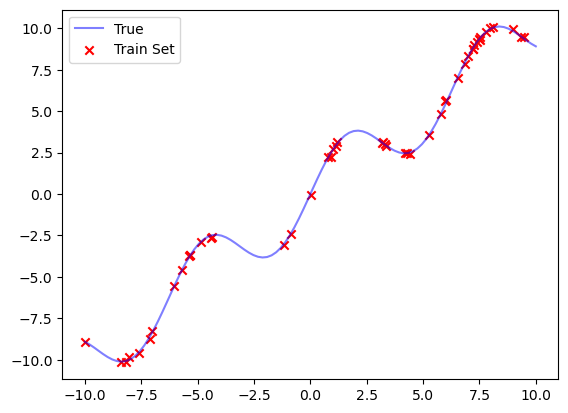

In [5]:
# Define some data

f = lambda x: 2*np.sin(x)+x

n  = 50
m = 100

X = np.random.uniform(-10, 10, n)
y = f(X) + np.random.normal(0, 0.1, n)
Z = np.linspace(-10, 10, m)

plt.figure()
plt.plot(Z, f(Z), color = 'blue', label = 'True', alpha = 0.5)
plt.scatter(X, y, color = 'red', label = 'Train Set', marker='x')
plt.legend()
plt.show()

X = X.reshape(-1, 1)
Z = Z.reshape(-1, 1)

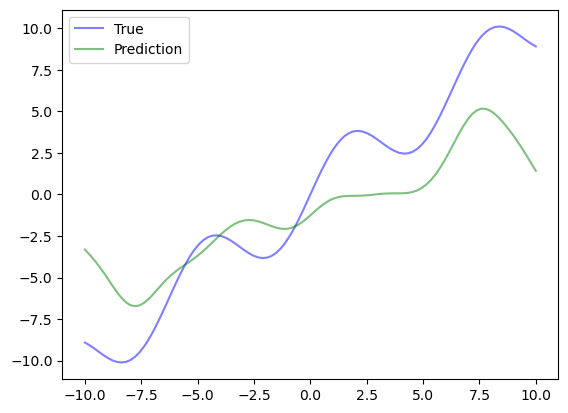

In [6]:
# Hyperparameters (to be tuned)
kernel = "gaussian"  # test 'linear' or 'gaussian'
sigma = 1
lbda = 0.1

# Define kernel
if kernel == "linear":
    kernel = LinearKernel()
elif kernel == "gaussian":
    kernel = GaussianKernel(sigma=sigma)
else:
    raise ValueError("Unknown kernel")

# Compute the Gram matrices
Kxx = kernel.get_Kxx(X)
Kxz = kernel.get_Kxz(X, Z)

# Center data in the RKHS
Kxx_c = center_train_gram_matrix(Kxx)
Kxz_c = center_test_gram_matrix(Kxx, Kxz)

# We don't need the uncetered Gram matrices anymore
Kxx = Kxx_c
Kxz = Kxz_c

# Compute optimal alpha
alpha = get_alpha_KRR(Kxx, y, lbda)

# Get the predictions
Y_pred = kernel.compute_prediction_test(Kxz, alpha)

# Plot the predictions
plt.figure()
plt.plot(Z, f(Z), color="blue", label="True", alpha=0.5)
plt.plot(Z, Y_pred, color="green", label="Prediction", alpha=0.5)
plt.legend()
plt.show()

# IV. Kernel PCA

## Reminder on PCA:


$\def\norm#1{\|#1\|}\def\pair#1{\langle #1 \rangle}\def\set#1{\lbrace#1\rbrace}$
$\def\RR{\mathbf{R}}$
$\def\trace{\operatorname{trace}}$

PCA is an unsupervised Machine Learning technique that learns a low-dimentional representation of the data.


We have a set $x_1,\ldots, x_n$ of vectors in $\RR^d$.

We project them to a lower dimention subspace spanned by the orthonormal vectors $v_1,\ldots,  v_k$.
For a single vector $x$, the projection is
$$
 P_V(x_i) = \sum_{i=1}^k \pair{x, v_i} v_i
$$
In matrix form, the orthogonal projection onto the span of $v$ is

$$
 P_V = V^TV
$$
where
$
 V = \lbrack v_1, \dots,  v_k \rbrack^T
$
satisfies $VV^T = I_k$. (since the $v_j$ are orthonormal).

In PCA, we try to find a subspace of dimensions $k$ such that the projection on this subspace is as close as possible to the original data, that is we solve:

$$
\min_{V} \frac{1}{2}\norm{X - V^TVX}^2
$$
over the orthonormal matrices $V$.
Apply pythagoria's theorem to split the norm:
$$
\frac{1}{2}\norm{X - V^TVX}^2 = \quad \frac{1}{2}\norm{X}^2 + \frac{1}{2}\norm{V^TV X}^2 - \pair{X, V^TVX}.
$$

The first term is constant with respect to $V$.
The second term is equal to $(1/2)\norm{V X}^2$ by isometry, and the last term
is $-\norm{VX}^2$.

Therfore the objective is also
$$
    \max_{V} \norm{VX}^2 = \max_{V} \trace{VX^TXV^T}
$$

We can show that in the last expression that $V$ is the top $k$-components of the
eigen decomposition of $XX^T$.

## PCA in a RKHS

$\def\norm#1{\|#1\|}\def\pair#1{\langle #1 \rangle}\def\set#1{\lbrace#1\rbrace}$
$\def\RR{\mathbf{R}}$
$\def\trace{\operatorname{trace}}$
$\def\XX{\mathcal{X}}\def\HH{\mathcal{H}}$
$\def\argmin{\operatorname{argmin}}$
$\def\argmax{\operatorname{argmax}}$


We can proceed as before except that we try to find a $k$ dimentionnal representation of the vectors in the RKHS $\phi(x_1),...,\phi(x_n)$. The only difficulty is that those vectors are of infinite dimensions.

Let's first focus on the projection over a single vector ($k=1$). For a  unitary vector $f\in \HH$, $\norm{f}^2 = 1$, we can still define the projection
$$
P_f: \HH\to \HH ,\ g \mapsto \pair {g, f}f
$$
And the optimal vector is
$$
f^* = \argmin_{f \in \mathcal{H}, ||f|| = 1} \sum_{i=1}^n || P_f(\phi(x_i)) - \phi(x_i)||_\mathcal{H}^2
$$

Q1) Prove that

$$
f^* = \argmax_{f \in \mathcal{H}, ||f|| = 1} \sum_{i=1}^n f(x_i)^2
$$

(Tip: remember the reproducing property !)

We start with the projection $ P_f(\phi(x_i)) = f(x_i) f $ and the projection error:

$$
||P_f(\phi(x_i)) - \phi(x_i)||_\mathcal{H}^2 = ||\phi(x_i)||_\mathcal{H}^2 - f(x_i)^2.
$$

Summing over all points:

$$
\sum_{i=1}^n ||P_f(\phi(x_i)) - \phi(x_i)||_\mathcal{H}^2 = \sum_{i=1}^n \left( ||\phi(x_i)||_\mathcal{H}^2 - f(x_i)^2 \right).
$$

Minimizing the projection error is equivalent to maximizing $ \sum_{i=1}^n f(x_i)^2 $. Therefore, the optimal $ f^* $ is:

$$
f^* = \argmax_{f \in \mathcal{H}, ||f|| = 1} \sum_{i=1}^n f(x_i)^2.
$$

Q2) Let's prove a variant of the representer theorem for this new optimization problem. We split $\HH$ into the span of the $\phi(x_1),\ldots,\phi(x_n)$ and its complement, that is for each $f \in \mathcal{H}$ we denote

$$ f = f_X + f_\bot$$

where $f_X = \sum \alpha_i \phi(x_i)$ and $\langle f_\bot, f_X \rangle = 0$.

Prove the representer theorem i.e. that the optimal $f$ satisfies $f = f_X$.

To prove that the optimal solution $f^*$ lies in the span of $\phi(x_1), \ldots, \phi(x_n)$, we decompose $f$ as:

$$
f = f_X + f_\perp,
$$

where $f_X = \sum_{i=1}^n \alpha_i \phi(x_i)$ and $\langle f_\perp, \phi(x_i) \rangle = 0$.

Using the reproducing property, we get $f(x_i) = \langle f_X, \phi(x_i) \rangle$. Since $f_\perp$ does not contribute to $f(x_i)$, the objective function $\sum_{i=1}^n f(x_i)^2$ depends only on $f_X$.

The norm constraint $||f||_\mathcal{H}^2 = 1$ implies that any non-zero $f_\perp$ would reduce the contribution of $f_X$, so the optimal solution is $f_\perp = 0$, i.e., $f = f_X$.

Thus, $f^*$ lies entirely in the span of $\phi(x_1), \ldots, \phi(x_n)$.

Q3) Apply the representer theorem to get a optimization problem over $\alpha \in \mathbb{R}^n$. As always the problem should depend only on $\alpha$ and the kernel matrix $K$.

[ANSWER HERE]

Q4) Use the change of variable $\beta = \sqrt{K} \alpha$ to rewrite the problem as an eigenvalue problem.

[ANSWER HERE]

Q5) Let's say that we have found the $k$ principal vectors $f_1,...,f_k$ and that they all have the form

$$f_j = \sum_i \alpha_{i,j} \phi(x_i)$$

We are now given an new point $x$ (not necessarily in the train set). Give the expression of the $k$ principal components of $\phi(X)$:

$$ u(x)_j = \langle \phi(x), f_j \rangle$$

Give the expression of vector $u(x)$ depending on the matrix $\alpha$ and the vector $k_x = [k(x,x_1),...,k(x,x_n)]$

In conclusion, the algorithm for kernel PCA is :

* compute the gram matrix and center it.
* decompose it, keep the first $k$ eigenvectors, and eigenvalues.
* At a test point $x$, compute the k principal components. (Don't forget to center the test points too!)

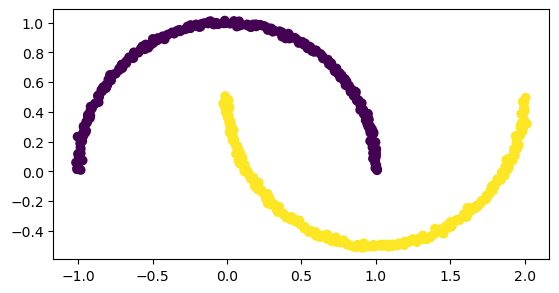

In [7]:
random_state = 17
n_samples = 500
X, y = make_moons(n_samples=n_samples, noise=0.01, random_state=random_state)
#X, y = make_circles(n_samples=n_samples, noise=0.01, factor=0.3, random_state=random_state)
#X, y = make_blobs(n_samples=n_samples, centers=3, cluster_std=1.0, random_state=random_state)

fig, ax = plt.subplots()
_ = ax.scatter(X[:,0], X[:,1], c=y)
ax.set_aspect('equal')

In [8]:
def make_grid(n,X):
    """
        Generates a grid of points within the bounds of the given data.

        n : int
            The number of points along each dimension of the grid.
        X : numpy.ndarray
            A 2D array of shape (num_samples, 2) representing the input data.

        numpy.ndarray
            A 2D array of shape (n*n, 2) containing the grid points.
    """
    x_min, y_min = np.min(X, axis=0)
    x_max, y_max = np.max(X, axis=0)
    xy = np.mgrid[x_min:x_max:1j*n, y_min:y_max:1j*n].reshape(2,-1).T
    return xy

In [9]:
# Hyperparameters (to be tuned)
kernel = 'linear' # test 'linear' or 'gaussian'
sigma = 1
lbda = 0.1

# Define kernel
if kernel == 'linear':
    kernel = LinearKernel()
elif kernel == 'gaussian':
    kernel = GaussianKernel(sigma = sigma)
else:
    raise ValueError('Unknown kernel')


def KPCA_representation(X):
    """
    Compute the finite-dimensional representation of the principal components.

    Parameters
    ----------
    X : (n, d) numpy.ndarray
        The input data.

    Returns
    -------
    alpha : (n, k) numpy.ndarray
        The finite-dimensional representation of the principal components.
    """
    # get the kernel matrix, center it, get the eigenvectors and eigenvalues, change the variables.
    ...

In [10]:
def principal_component(alpha, X, Z):
    """
    return the evaluation of the principal components at points Z.

    Parameters
    ----------
    alpha : (n, k) numpy.ndarray
        The finite-dimensional representation of the principal components
    X: (n, d) numpy.ndarray
        The input data.
    Z : (m, n) array
        points to where to evaluate the principal components.

    Returns
    -------
    (k, m) array
        value of the k principal components at points y.
    """
    ...

In [11]:
n_eval = 200
Z = make_grid(n_eval, X)

alpha = KPCA_representation(X)
principal_component_fn = lambda E: principal_component(alpha, X, E)
feval = principal_component(Z)
fself = principal_component(X)

TypeError: principal_component() missing 2 required positional arguments: 'X' and 'Z'

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
Ep = Z.T.reshape((2, n_eval, n_eval))
fxp = feval.reshape((feval.shape[0], n_eval, n_eval))
_ = ax1.contourf(Ep[0], Ep[1], fxp[0])
_ = ax1.contour(Ep[0], Ep[1], fxp[1], colors='black', levels=12 )
_ = ax1.scatter(X[:,0], X[:,1], c=y)
ax2.scatter(fself[0], fself[1], c=y)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
#ax2.xaxis.set_visible(False)
#ax2.yaxis.set_visible(False)
ax1.set_aspect('equal')
ax2.set_aspect('equal')
ax1.set_title('First pc = colors, second pc = level set')
ax2.set_title('Data projection on the principal components')
ax2.set_xlabel('First principal component')
ax2.set_ylabel('Second principal component')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

# V. Kernel Quantile Regression

Recall that least squares regression as seen in the previous part is the empirical version of

$$ \min_f E_{x,y}[ ( f(x) - y)^2  ]$$

We can play a bit with this objective

\begin{align*}
E_{x,y}[ ( f(x) - y)^2  ] &= E_{x}[ E_{y}[( f(x) - y)^2 | x ] ] \\
&= E_{x}\left[ f(x)^2 - 2 f(x) E_{y}[y|x] + E_{y}[y|x]^2 \right] \\
&= E_{x}\left[ ( f(x) - E[y|x])^2 \right]
\end{align*}

And we immediatly see that the best possible $f$ which is called the Bayes Optimal is

$$f^*(x) = E[y|x]$$

In conclusion: when we solve a least square problem, we try to approximate the Bayes Optimal, that is the condionnal expectation.

What about the cases where we are not interested in the conditonnal expectation ?

For instance, in many economic application we are rather interested in predicting quantiles, for instance we want to predict the value $f_r(x)$ such that

$$ P( y > f_r(x) ) = r$$

For $r = 0.5$ this is the median of y given x.

[ANSWER HERE]

In [ ]:
n = 500

f = lambda x: x
g = lambda x: x

X = np.random.uniform(0, 10, n)
y = f(X) + np.random.exponential(1, n)*g(X)
mean = f(X) + g(X)
median = f(X) + g(X)*np.log(2)

plt.figure()
plt.scatter(X, y, color = 'red', label = 'Train Set', marker='x', alpha = 0.5)
plt.plot(X, mean, color = 'blue', label = r'$f^*(y)$')
plt.plot(X, median, color = 'green', label = r'$f_0(x)$')
plt.legend()
plt.show()


Let us define the "Pinball loss" $\ell_r$ as

$$
 \ell_r(u)=
\begin{cases}
    -(1-r)u,& \text{if} & u \leq 0\\
    r u,& \text{if} & u \geq 0
\end{cases}
$$

We can prove that minimizing this loss yiels the function we wanted

$$
f_r = \argmin E_{x,y}[\ell_r(y-f(x))  ]
$$

Q1) For the sake of simplicity we will prove only the case $r=(1/2)$ i.e. $\ell_{\frac{1}{2}}(u) = (1/2)|u|$, but it is very easy to generalize the proof.

To prove the result we just have to prove that the minimum of $J(z) = E_y[|y - z|]$ is reached for some z that satisfies $P(y=z) = 0.5$. Here are the steps to follow:

- Prove that J is convex
- Show that
 $$J(z) = \int_{z}^{+\infty }(y-z) p(y) dy - \int_{-\infty}^{z}(y-z) p(y) dy$$
- Compute $J'(z)$ and solve $J'(z)=0$.

[ANSWER HERE]

We can now use the usual kernel machinery to approximate $f_r$ by solving

\begin{equation*}
\min_{f \in \mathcal{H}} \frac{1}{n}\sum_{i=1}^n \ell_r(y - f(x)) + \lambda ||f||_\mathcal{H}^2
\end{equation*}

Note that

\begin{equation}

\begin{aligned}
\ell_r(u) = \min_{u^+, u^-} \quad & r u^+  +  (1-r)u^- \\
\textrm{s.t.} \quad & u^+ - u^- = u\\
  &u^+, u^-\geq 0    \\
\end{aligned}
\end{equation}

Thus the problem rewrites

\begin{equation}
\begin{aligned}
\min_{f \in \mathcal{H}, u^+, u^-}  \quad & \frac{1}{n}\sum_{i=1}^n r u^+_i  +  (1-r)u^-_i + \lambda ||f||_\mathcal{H}^2\\
\textrm{s.t.} \quad & \begin{cases}
                            u^+ \geq 0   \\
                            u^- \geq 0   \\
                            u^+ \geq y - f(x) \\
                            u^- \geq f(x) - y
                    \end{cases}
\end{aligned}
\end{equation}

The trick that we used is very important: we introduced new variables and constraints but now the objective of the optimization problem is linear!

Finally we apply the representer theorem (and denote $C = 2 n \lambda$) so we get

\begin{equation}
\begin{aligned}
\min_{\alpha, u^+, u^-}  \quad &  \langle r u^+_i  +  (1-r)u^-_i, \mathbf{1} \rangle + \frac{1}{2} C \langle  \alpha, K \alpha\rangle\\
\textrm{s.t.} \quad & \begin{cases}
                            u^+ \geq 0   \\
                            u^- \geq 0   \\
                            u^+ \geq y - K\alpha \\
                            u^- \geq K\alpha - y
                    \end{cases}
\end{aligned}
\end{equation}



Q2) Compute the dual of this problem, denote the 4 dual variable $\mu^+, \mu^-, \lambda^+$ and $\lambda^-$.

[DO THE COMPUTATIONS ON PAPER, write the result here]

If everything went well you should get that the minimization problem rewrites

\begin{equation}
\begin{aligned}
\min_{\alpha}  \quad &  - \langle y, \alpha\rangle + \langle \alpha, K \alpha\rangle\\
\textrm{s.t.} \quad & \begin{cases}
                            -(1-r) \leq C \alpha \leq r \\
                            \langle \alpha, \mathbf{1} \rangle = 1
                    \end{cases}
\end{aligned}
\end{equation}

Q3) Using the convex programming software of your choice (e.g. cvxopt) implement the solver to find $\alpha^*$
